# Data Preprocessing of Airline_Delay_Cause Data

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing Process

In [70]:
# Reading the File
data=pd.read_csv(r"D:\Project\Airline_Delay_Cause.csv")

In [71]:
# Displaying the first 5 row of the dataframe
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",86.0,2.0,0.00,0.74,...,0.0,0.00,0.0,0.0,54.0,0.0,26.0,28.0,0.0,0.0
1,2022,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",59.0,5.0,1.77,0.00,...,0.0,1.29,0.0,0.0,290.0,178.0,0.0,69.0,0.0,43.0
2,2022,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",21.0,1.0,0.01,0.00,...,0.0,0.99,0.0,0.0,118.0,1.0,0.0,0.0,0.0,117.0
3,2022,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",98.0,15.0,5.11,0.00,...,0.0,7.20,3.0,0.0,1270.0,334.0,0.0,62.0,0.0,874.0
4,2022,11,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1143.0,114.0,28.67,2.26,...,0.0,45.80,3.0,1.0,10874.0,5451.0,128.0,1071.0,0.0,4224.0


In [72]:
# Displaying the information about Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78439 entries, 0 to 78438
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 78439 non-null  int64  
 1   month                78439 non-null  int64  
 2   carrier              78439 non-null  object 
 3   carrier_name         78439 non-null  object 
 4   airport              78439 non-null  object 
 5   airport_name         78439 non-null  object 
 6   arr_flights          78306 non-null  float64
 7   arr_del15            78119 non-null  float64
 8   carrier_ct           78306 non-null  float64
 9   weather_ct           78306 non-null  float64
 10  nas_ct               78306 non-null  float64
 11  security_ct          78306 non-null  float64
 12  late_aircraft_ct     78306 non-null  float64
 13  arr_cancelled        78306 non-null  float64
 14  arr_diverted         78306 non-null  float64
 15  arr_delay            78306 non-null 

In [73]:
# Looking at the shape of the dataframe
data.shape

(78439, 21)

In [74]:
# Displaying columns of DataFrame
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Data Cleaning Processes

In [75]:
# Looking for Replicated Data 
data.duplicated().sum()

0

In [76]:
# Displaying summary statistics for the dataframe
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,78439.000000,78439.000000,78306.000000,78119.000000,78306.000000,78306.000000,78306.000000,78306.000000,78306.000000,78306.00000,78306.000000,78306.000000,78306.000000,78306.000000,78306.000000,78306.000000,78306.000000
mean,2020.463647,6.375260,310.037775,52.047479,17.943615,1.969476,14.403887,0.162412,17.443846,8.55264,0.705821,3469.000613,1286.296005,206.143041,690.146885,7.675006,1278.732920
std,1.122078,3.403448,879.364450,151.152480,47.772571,6.975048,50.235916,0.795923,57.797058,56.24872,3.247773,11070.171146,4030.409668,823.573748,2853.658320,47.044444,4383.310455
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,37.000000,5.000000,1.700000,0.000000,0.530000,0.000000,0.820000,0.00000,0.000000,231.000000,75.000000,0.000000,17.000000,0.000000,26.000000
50%,2020.000000,6.000000,86.000000,13.000000,5.000000,0.150000,2.740000,0.000000,3.210000,1.00000,0.000000,767.000000,286.000000,8.000000,100.000000,0.000000,206.000000
75%,2021.000000,9.000000,208.000000,35.000000,13.860000,1.570000,8.380000,0.000000,10.710000,4.00000,0.000000,2242.000000,925.000000,124.000000,338.000000,0.000000,782.000000
max,2022.000000,12.000000,21873.000000,3714.000000,1147.000000,226.000000,1485.820000,58.690000,1531.810000,4951.00000,154.000000,329847.000000,119425.000000,27876.000000,97283.000000,3760.000000,143192.000000


In [77]:
# Checking the missing values
missing_Data=data.isnull().sum()
print(missing_Data)

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            133
arr_del15              320
carrier_ct             133
weather_ct             133
nas_ct                 133
security_ct            133
late_aircraft_ct       133
arr_cancelled          133
arr_diverted           133
arr_delay              133
carrier_delay          133
weather_delay          133
nas_delay              133
security_delay         133
late_aircraft_delay    133
dtype: int64


In [78]:
from sklearn.impute import SimpleImputer

In [79]:
data1=data.fillna(data.mean())

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_13304\2641437176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1=data.fillna(data.mean())


In [80]:
# Checking the missing values
missing_Data1=data1.isnull().sum()
print(missing_Data1)

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [81]:
# Displaying the information about Dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78439 entries, 0 to 78438
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 78439 non-null  int64  
 1   month                78439 non-null  int64  
 2   carrier              78439 non-null  object 
 3   carrier_name         78439 non-null  object 
 4   airport              78439 non-null  object 
 5   airport_name         78439 non-null  object 
 6   arr_flights          78439 non-null  float64
 7   arr_del15            78439 non-null  float64
 8   carrier_ct           78439 non-null  float64
 9   weather_ct           78439 non-null  float64
 10  nas_ct               78439 non-null  float64
 11  security_ct          78439 non-null  float64
 12  late_aircraft_ct     78439 non-null  float64
 13  arr_cancelled        78439 non-null  float64
 14  arr_diverted         78439 non-null  float64
 15  arr_delay            78439 non-null 

In [82]:
# saving it to a new file
#data1.to_csv(r'D:\Project\Processed Dataset\flight_data.csv')

In [83]:
# Reading the File
data2=pd.read_csv(r"D:\Project\Processed Dataset\flight_data.csv")

In [84]:
data2.shape

(78439, 22)

# EDA with flight data

Feature exploration


Since there are no missing values or categorical variables we can continue further and look at the corellation between various features of the dataframe

<AxesSubplot:>

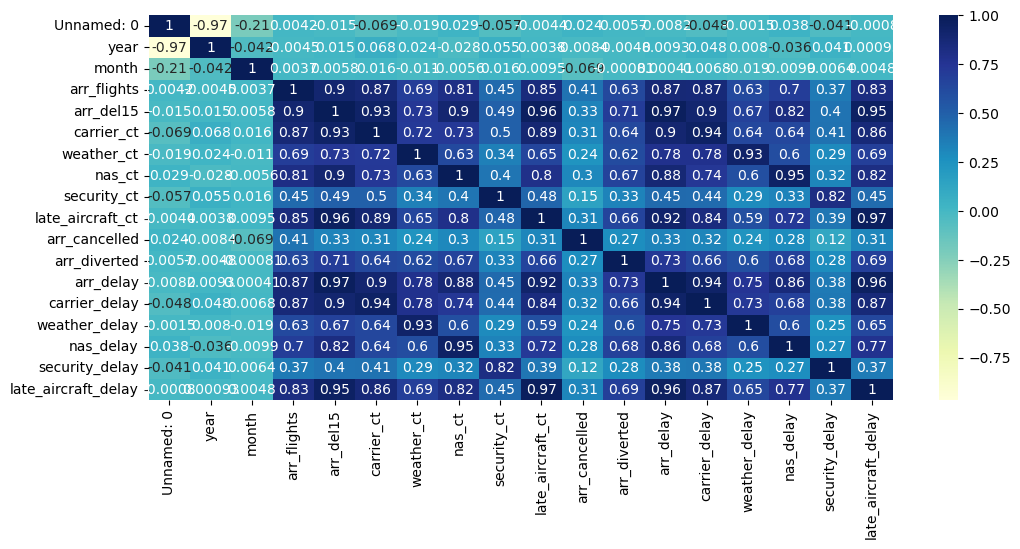

In [90]:
flight_data_corr=data2.corr()
plt.figure(figsize=(12,5))
sns.heatmap(flight_data_corr,annot=True,cmap="YlGnBu")

In [91]:
data2.corr()

,Unnamed: 0,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
Unnamed: 0,1.000000,-0.968011,-0.208242,0.004205,-0.014745,-0.069039,-0.018650,0.028773,-0.056722,-0.004392,0.024050,0.005662,-0.008224,-0.047653,-0.001530,0.037744,-0.041161,-0.000796
year,-0.968011,1.000000,-0.042091,-0.004542,0.014987,0.068250,0.023523,-0.027586,0.054541,0.003848,-0.008352,-0.004757,0.009348,0.047742,0.007952,-0.035571,0.041195,0.000933
month,-0.208242,-0.042091,1.000000,0.003675,0.005752,0.015701,-0.011404,-0.005638,0.016194,0.009474,-0.069476,-0.000812,0.000411,0.006751,-0.019218,-0.009902,0.006383,0.004819
arr_flights,0.004205,-0.004542,0.003675,1.000000,0.904820,0.874922,0.694268,0.808069,0.451845,0.848677,0.406174,0.633835,0.869628,0.866397,0.626050,0.695172,0.370058,0.825447
arr_del15,-0.014745,0.014987,0.005752,0.904820,1.000000,0.934932,0.732745,0.899474,0.494395,0.962289,0.329562,0.705086,0.969632,0.904307,0.672835,0.824348,0.403877,0.949904
carrier_ct,-0.069039,0.068250,0.015701,0.874922,0.934932,1.000000,0.720655,0.727514,0.499023,0.890208,0.310392,0.635729,0.899898,0.943163,0.643167,0.642532,0.413681,0.861898
weather_ct,-0.018650,0.023523,-0.011404,0.694268,0.732745,0.720655,1.000000,0.628903,0.340311,0.646953,0.242113,0.621719,0.784680,0.783957,0.929595,0.604234,0.293299,0.689708
nas_ct,0.028773,-0.027586,-0.005638,0.808069,0.899474,0.727514,0.628903,1.000000,0.399884,0.798221,0.303678,0.667578,0.882310,0.738433,0.598335,0.945939,0.322127,0.817607
security_ct,-0.056722,0.054541,0.016194,0.451845,0.494395,0.499023,0.340311,0.399884,1.000000,0.476969,0.154007,0.329855,0.446973,0.441600,0.287770,0.327984,0.818489,0.446414
late_aircraft_ct,-0.004392,0.003848,0.009474,0.848677,0.962289,0.890208,0.646953,0.798221,0.476969,1.000000,0.308922,0.656899,0.921899,0.840731,0.590231,0.723086,0.386734,0.969439


# preparing Dataset for Classification model

In [92]:
from sklearn.preprocessing import StandardScaler


In [93]:
# Split the data into input features (X) and target variable (y)
X = data2.drop(['arr_delay','year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_cancelled'], axis=1)
y = data2['arr_delay']

In [94]:
# Create a StandardScaler object
scaler = StandardScaler()

In [95]:
# Fit the scaler to the input features
scaler.fit(X)


StandardScaler()

In [96]:
# Transform the input features
X_scaled = scaler.transform(X)

In [97]:
X_scaled

array([[-1.73202873, -0.33178549, -0.37592622, ..., -0.23223285,
        -0.16328325, -0.29197717],
       [-1.73198456, -0.31189725, -0.33884398, ..., -0.21785304,
        -0.16328325, -0.28215884],
       [-1.7319404 , -0.33841491, -0.37571671, ..., -0.24205321,
        -0.16328325, -0.26526218],
       ...,
       [ 1.7319404 , -0.17267954, -0.27808777, ..., -0.0723013 ,
        -0.16328325, -0.20909222],
       [ 1.73198456, -0.11301481, -0.23283487, ..., -0.05862294,
        -0.16328325, -0.1373956 ],
       [ 1.73202873, -0.31852667, -0.35162374, ..., -0.22767339,
        -0.16328325, -0.28855217]])

In [98]:
# Convert the scaled input features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [99]:
X_scaled_df

,Unnamed: 0,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-1.732029,-0.331785,-0.375926,-0.176419,-0.261867,-0.204229,-0.302070,-0.217510,-0.319421,-0.218920,-0.232233,-0.163283,-0.291977
1,-1.731985,-0.311897,-0.338844,-0.282602,-0.248319,-0.204229,-0.279732,-0.217510,-0.275219,-0.250517,-0.217853,-0.163283,-0.282159
2,-1.731940,-0.338415,-0.375717,-0.282602,-0.286970,-0.204229,-0.284927,-0.217510,-0.319172,-0.250517,-0.242053,-0.163283,-0.265262
3,-1.731896,-0.245603,-0.268870,-0.282602,-0.233377,-0.204229,-0.177390,-0.217510,-0.236480,-0.250517,-0.220308,-0.163283,-0.092414
4,-1.731852,0.410709,0.224722,0.041687,0.455564,-0.204229,0.491035,0.090656,1.034204,-0.094964,0.133576,-0.163283,0.672502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78434,1.731852,0.105756,-0.122007,-0.014274,0.071048,-0.204229,0.322024,-0.217510,-0.169680,-0.012326,0.031514,-0.163283,0.292327
78435,1.731896,-0.252233,-0.318522,-0.183593,-0.237959,-0.204229,-0.161632,0.090656,-0.239211,-0.212844,-0.202772,-0.163283,-0.232611
78436,1.731940,-0.172680,-0.278088,0.041687,-0.051678,-0.204229,-0.176351,-0.217510,-0.241695,-0.130207,-0.072301,-0.163283,-0.209092
78437,1.731985,-0.113015,-0.232835,0.710355,-0.057854,-0.204229,-0.133232,-0.217510,-0.201714,0.518742,-0.058623,-0.163283,-0.137396


In [100]:
# Drop unnamed column
Scaled_data=X_scaled_df.drop(['Unnamed: 0'],axis=1)

In [101]:
# convert Numeric Feature into categorical
threshold = 0 # Example threshold
y_train_binary = (y > threshold).astype(int)

In [102]:
y_train_binary.head()

0    1
1    1
2    1
3    1
4    1
Name: arr_delay, dtype: int32

In [103]:
# Concatenate the scaled input features with the target variable
df_scaled = pd.concat([Scaled_data, y_train_binary], axis=1)


In [104]:
df_scaled

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,-0.331785,-0.375926,-0.176419,-0.261867,-0.204229,-0.302070,-0.217510,-0.319421,-0.218920,-0.232233,-0.163283,-0.291977,1
1,-0.311897,-0.338844,-0.282602,-0.248319,-0.204229,-0.279732,-0.217510,-0.275219,-0.250517,-0.217853,-0.163283,-0.282159,1
2,-0.338415,-0.375717,-0.282602,-0.286970,-0.204229,-0.284927,-0.217510,-0.319172,-0.250517,-0.242053,-0.163283,-0.265262,1
3,-0.245603,-0.268870,-0.282602,-0.233377,-0.204229,-0.177390,-0.217510,-0.236480,-0.250517,-0.220308,-0.163283,-0.092414,1
4,0.410709,0.224722,0.041687,0.455564,-0.204229,0.491035,0.090656,1.034204,-0.094964,0.133576,-0.163283,0.672502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78434,0.105756,-0.122007,-0.014274,0.071048,-0.204229,0.322024,-0.217510,-0.169680,-0.012326,0.031514,-0.163283,0.292327,1
78435,-0.252233,-0.318522,-0.183593,-0.237959,-0.204229,-0.161632,0.090656,-0.239211,-0.212844,-0.202772,-0.163283,-0.232611,1
78436,-0.172680,-0.278088,0.041687,-0.051678,-0.204229,-0.176351,-0.217510,-0.241695,-0.130207,-0.072301,-0.163283,-0.209092,1
78437,-0.113015,-0.232835,0.710355,-0.057854,-0.204229,-0.133232,-0.217510,-0.201714,0.518742,-0.058623,-0.163283,-0.137396,1


In [114]:
fc=data[['year','month','airport']]

In [115]:
fc

,year,month,airport
0,2022,11,ABY
1,2022,11,AEX
2,2022,11,AGS
3,2022,11,ALB
4,2022,11,ATL
...,...,...,...
78434,2019,1,RIC
78435,2019,1,ROA
78436,2019,1,ROC
78437,2019,1,RST


In [118]:
# Concatenate the scaled input features with the target variable
finalC = pd.concat([fc,df_scaled], axis=1)


In [119]:
finalC

,year,month,airport,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2022,11,ABY,-0.331785,-0.375926,-0.176419,-0.261867,-0.204229,-0.302070,-0.217510,-0.319421,-0.218920,-0.232233,-0.163283,-0.291977,1
1,2022,11,AEX,-0.311897,-0.338844,-0.282602,-0.248319,-0.204229,-0.279732,-0.217510,-0.275219,-0.250517,-0.217853,-0.163283,-0.282159,1
2,2022,11,AGS,-0.338415,-0.375717,-0.282602,-0.286970,-0.204229,-0.284927,-0.217510,-0.319172,-0.250517,-0.242053,-0.163283,-0.265262,1
3,2022,11,ALB,-0.245603,-0.268870,-0.282602,-0.233377,-0.204229,-0.177390,-0.217510,-0.236480,-0.250517,-0.220308,-0.163283,-0.092414,1
4,2022,11,ATL,0.410709,0.224722,0.041687,0.455564,-0.204229,0.491035,0.090656,1.034204,-0.094964,0.133576,-0.163283,0.672502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78434,2019,1,RIC,0.105756,-0.122007,-0.014274,0.071048,-0.204229,0.322024,-0.217510,-0.169680,-0.012326,0.031514,-0.163283,0.292327,1
78435,2019,1,ROA,-0.252233,-0.318522,-0.183593,-0.237959,-0.204229,-0.161632,0.090656,-0.239211,-0.212844,-0.202772,-0.163283,-0.232611,1
78436,2019,1,ROC,-0.172680,-0.278088,0.041687,-0.051678,-0.204229,-0.176351,-0.217510,-0.241695,-0.130207,-0.072301,-0.163283,-0.209092,1
78437,2019,1,RST,-0.113015,-0.232835,0.710355,-0.057854,-0.204229,-0.133232,-0.217510,-0.201714,0.518742,-0.058623,-0.163283,-0.137396,1


In [120]:
# saving it to a new file
finalC.to_csv(r'D:\Project\project_Dataset\finalclassification.csv')

In [42]:
# Reading the File
data3=pd.read_csv(r"D:\Project\Processed Dataset\flight_data.csv")

In [56]:
# Split the data into input features (X) and target variable (y)
X = data3.drop(['arr_delay','year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_cancelled'], axis=1)
y = data3['arr_delay']

In [57]:
# Create a StandardScaler object
scaler_y = StandardScaler()

In [58]:
# Fit the scaler to the input features and Transform
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [59]:
df_scaled.shape

(78439, 13)

In [60]:
X_scaled

array([[-1.73202873, -0.33178549, -0.37592622, ..., -0.23223285,
        -0.16328325, -0.29197717],
       [-1.73198456, -0.31189725, -0.33884398, ..., -0.21785304,
        -0.16328325, -0.28215884],
       [-1.7319404 , -0.33841491, -0.37571671, ..., -0.24205321,
        -0.16328325, -0.26526218],
       ...,
       [ 1.7319404 , -0.17267954, -0.27808777, ..., -0.0723013 ,
        -0.16328325, -0.20909222],
       [ 1.73198456, -0.11301481, -0.23283487, ..., -0.05862294,
        -0.16328325, -0.1373956 ],
       [ 1.73202873, -0.31852667, -0.35162374, ..., -0.22767339,
        -0.16328325, -0.28855217]])

In [61]:
y_scaled

array([[-0.30875054],
       [-0.28741376],
       [-0.3029643 ],
       ...,
       [-0.19980637],
       [-0.10505659],
       [-0.30278348]])

In [62]:
# Convert the scaled input features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [130]:
# Convert the scaled input features back to a DataFrame
y_scaled_df = pd.DataFrame(y_scaled, columns=['arr_delay_scaled'])


In [133]:
# Drop unnamed column
X_scaled_df=X_scaled_df.drop(['Unnamed: 0'],axis=1)

In [134]:
# Concatenate the scaled input features with the Orignal target variable for regression.
df_reg = pd.concat([X_scaled_df, y_scaled_df], axis=1)

In [135]:
fr=data[['year','month','airport']]

In [136]:
# Concatenate the scaled input features with the Orignal target variable for regression.
final_r = pd.concat([fr,X_scaled_df, y_scaled_df], axis=1)

In [137]:
final_r

,year,month,airport,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay_scaled
0,2022,11,ABY,-0.331785,-0.375926,-0.176419,-0.261867,-0.204229,-0.302070,-0.217510,-0.319421,-0.218920,-0.232233,-0.163283,-0.291977,-0.308751
1,2022,11,AEX,-0.311897,-0.338844,-0.282602,-0.248319,-0.204229,-0.279732,-0.217510,-0.275219,-0.250517,-0.217853,-0.163283,-0.282159,-0.287414
2,2022,11,AGS,-0.338415,-0.375717,-0.282602,-0.286970,-0.204229,-0.284927,-0.217510,-0.319172,-0.250517,-0.242053,-0.163283,-0.265262,-0.302964
3,2022,11,ALB,-0.245603,-0.268870,-0.282602,-0.233377,-0.204229,-0.177390,-0.217510,-0.236480,-0.250517,-0.220308,-0.163283,-0.092414,-0.198812
4,2022,11,ATL,0.410709,0.224722,0.041687,0.455564,-0.204229,0.491035,0.090656,1.034204,-0.094964,0.133576,-0.163283,0.672502,0.669487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78434,2019,1,RIC,0.105756,-0.122007,-0.014274,0.071048,-0.204229,0.322024,-0.217510,-0.169680,-0.012326,0.031514,-0.163283,0.292327,0.060484
78435,2019,1,ROA,-0.252233,-0.318522,-0.183593,-0.237959,-0.204229,-0.161632,0.090656,-0.239211,-0.212844,-0.202772,-0.163283,-0.232611,-0.247995
78436,2019,1,ROC,-0.172680,-0.278088,0.041687,-0.051678,-0.204229,-0.176351,-0.217510,-0.241695,-0.130207,-0.072301,-0.163283,-0.209092,-0.199806
78437,2019,1,RST,-0.113015,-0.232835,0.710355,-0.057854,-0.204229,-0.133232,-0.217510,-0.201714,0.518742,-0.058623,-0.163283,-0.137396,-0.105057


In [138]:
# saving it to a new file
final_r.to_csv(r'D:\Project\project_Dataset\finalRegression.csv')

In [67]:
# saving it to a new file
#df_reg.to_csv(r'D:\Project\project_Dataset\reg_dataset.csv')